In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh, gs_Domain
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
lim2 = np.array([[ 1.38295616,  0.        ],
       [ 1.37819627,  0.1136394 ],
       [ 1.36411987,  0.22839392],
       [ 1.34147837,  0.33535708],
       [ 1.31160087,  0.428733  ],
       [ 1.27659351,  0.50348616],
       [ 1.23989537,  0.55532746],
       [ 1.20721657,  0.58207902],
       [ 1.18129551,  0.58932473],
       [ 1.0902428 ,  0.57841675],
       [ 0.99292215,  0.544273  ],
       [ 0.90082552,  0.48851609],
       [ 0.81867131,  0.41333246],
       [ 0.75043826,  0.32194035],
       [ 0.69936479,  0.2185339 ],
       [ 0.66782749,  0.10834806],
       [ 0.65723823,  0.        ],
       [ 0.66782749, -0.10834806],
       [ 0.69936479, -0.2185339 ],
       [ 0.75043826, -0.32194035],
       [ 0.81867131, -0.41333246],
       [ 0.90082552, -0.48851609],
       [ 0.99292215, -0.544273  ],
       [ 1.0902428 , -0.57841675],
       [ 1.18129551, -0.58932473],
       [ 1.20721657, -0.58207902],
       [ 1.23989537, -0.55532746],
       [ 1.27659351, -0.50348616],
       [ 1.31160087, -0.428733  ],
       [ 1.34147837, -0.33535708],
       [ 1.36411987, -0.22839392],
       [ 1.37819627, -0.1136394 ]])

vv2 = np.array([[ 1.39296493e+00, -1.38777878e-17],
       [ 1.38817072e+00,  1.14458731e-01],
       [ 1.37399275e+00,  2.30041200e-01],
       [ 1.35115684e+00,  3.37922814e-01],
       [ 1.32092944e+00,  4.32392306e-01],
       [ 1.28527112e+00,  5.08535482e-01],
       [ 1.24727606e+00,  5.62208864e-01],
       [ 1.21192830e+00,  5.91145285e-01],
       [ 1.18207641e+00,  5.99489787e-01],
       [ 1.08796580e+00,  5.88215468e-01],
       [ 9.88631600e-01,  5.53365296e-01],
       [ 8.94802348e-01,  4.96559420e-01],
       [ 8.11223325e-01,  4.20071879e-01],
       [ 7.41877594e-01,  3.27189432e-01],
       [ 6.89999158e-01,  2.22153185e-01],
       [ 6.57963346e-01,  1.10225658e-01],
       [ 6.47190584e-01, -6.93889390e-18],
       [ 6.57963346e-01, -1.10225658e-01],
       [ 6.89999158e-01, -2.22153185e-01],
       [ 7.41877594e-01, -3.27189432e-01],
       [ 8.11223325e-01, -4.20071879e-01],
       [ 8.94802348e-01, -4.96559420e-01],
       [ 9.88631600e-01, -5.53365296e-01],
       [ 1.08796580e+00, -5.88215468e-01],
       [ 1.18207641e+00, -5.99489787e-01],
       [ 1.21192830e+00, -5.91145285e-01],
       [ 1.24727606e+00, -5.62208864e-01],
       [ 1.28527112e+00, -5.08535482e-01],
       [ 1.32092944e+00, -4.32392306e-01],
       [ 1.35115684e+00, -3.37922814e-01],
       [ 1.37399275e+00, -2.30041200e-01],
       [ 1.38817072e+00, -1.14458731e-01]])

In [3]:
coils = {
    'CS0': {'rc': 0.58, 'zc': -.615, 'w': 0.075, 'h': 0.43},
    'CS1': {'rc': 0.58, 'zc': 0, 'w': 0.075, 'h': 0.8},
    'CS2': {'rc': 0.58, 'zc': .615, 'w': 0.075, 'h': 0.43},

    'EF0U': {'rc': .738, 'zc': 0.6, 'w': 0.125, 'h': 0.125},
    'EF1U': {'rc': 1.2, 'zc': 0.75, 'w': 0.175, 'h': 0.175},
    'EF2U': {'rc': 1.4, 'zc': 0.600, 'w': 0.15, 'h': 0.15},
    'EF3U': {'rc': 1.95, 'zc': 0.3, 'w': .175, 'h': .175},

    'EF0L': {'rc': .738, 'zc': -0.6, 'w': 0.125, 'h': 0.125},
    'EF1L': {'rc': 1.2, 'zc': -0.75, 'w': 0.175, 'h': 0.175},
    'EF2L': {'rc': 1.4, 'zc': -0.600, 'w': 0.15, 'h': 0.15},
    'EF3L': {'rc': 1.95, 'zc': -0.3, 'w': .175, 'h': .175},
  
}

In [4]:
plasma_dx = 0.02
coil_dx = 0.04
vv_dx = 0.01
vac_dx = 0.075

import json
with open('nsf_geom_new.json','r') as fid:
    nsf_geom = json.load(fid)

In [5]:
# Create a G-S domain
gs_mesh = gs_Domain()
    # Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')                     # Define the bounding region
gs_mesh.define_region('plasma',plasma_dx,'plasma')                 # Define the plasma region and resolution
gs_mesh.define_region('vv',vv_dx,'conductor',eta=8.6E-7)

    # Define each of the PF coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_dx,'coil')


#gs_mesh.define_region('plate_upper_inner',vv_dx,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_lower_inner',vv_dx,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_upper_outer',vv_dx,'conductor',eta=3.8E-8)
#gs_mesh.define_region('plate_lower_outer',vv_dx,'conductor',eta=3.8E-8)

In [6]:
gs_mesh.add_annulus(lim2, 'plasma', vv2, 'vv', parent_name = 'air')

for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air')

#gs_mesh.add_polygon(np.array(nsf_geom['in_upper_plate'])/1000, 'plate_upper_inner', parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['in_lower_plate'])/1000, 'plate_lower_inner', parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['out_upper_plate'])/1000, 'plate_upper_outer', parent_name = 'plasma')
#gs_mesh.add_polygon(np.array(nsf_geom['out_lower_plate'])/1000, 'plate_lower_outer', parent_name = 'plasma')

In [7]:
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()

Assembling regions:
  # of unique points    = 923
  # of unique segments  = 48
Generating mesh:
  # of points  = 5026
  # of cells   = 9934
  # of regions = 14


In [8]:
mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

#for i in range(3,11):
#    coil_reg_mat[i,i] = 1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Turn off divertor coils
#coil_bounds[-5:-1, 0] = 0
#coil_bounds[-5:-1, 1] = 0

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.914E+00
    # of points  =    5026
    # of edges   =   14959
    # of cells   =    9934
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  6.256E-03
    hrms =  3.599E-02
    hmax =  1.1

Starting non-linear GS solver
     1  6.9474E+00  3.2633E+00  2.8872E-02  1.0399E+00  2.0539E-02 -0.0000E+00
     2  6.1241E+00  2.8995E+00  6.1355E-03  1.0403E+00  1.8061E-02 -0.0000E+00
     3  5.8979E+00  2.7995E+00  9.1601E-04  1.0401E+00  1.6682E-02 -0.0000E+00
     4  5.8213E+00  2.7653E+00  5.4144E-04  1.0400E+00  1.5974E-02 -0.0000E+00
     5  5.7957E+00  2.7537E+00  3.5580E-04  1.0400E+00  1.5627E-02 -0.0000E+00
     6  5.7879E+00  2.7501E+00  1.9499E-04  1.0400E+00  1.5460E-02 -0.0000E+00
     7  5.7859E+00  2.7491E+00  9.9356E-05  1.0399E+00  1.5379E-02 -0.0000E+00
     8  5.7857E+00  2.7490E+00  4.9286E-05  1.0399E+00  1.5339E-02 -0.0000E+00
     9  5.7858E+00  2.7490E+00  2.4329E-05  1.0399E+00  1.5320E-02 -0.0000E+00
    10  5.7860E+00  2.7491E+00  1.2085E-05  1.0399E+00  1.5309E-02 -0.0000E+00
    11  5.7861E+00  2.7491E+00  6.0710E-06  1.0399E+00  1.5304E-02 -0.0000E+00
    12  5.7862E+00  2.7492E+00  3.0886E-06  1.0399E+00  1.5301E-02 -0.0000E+00
    13  5.7862E+00  2.

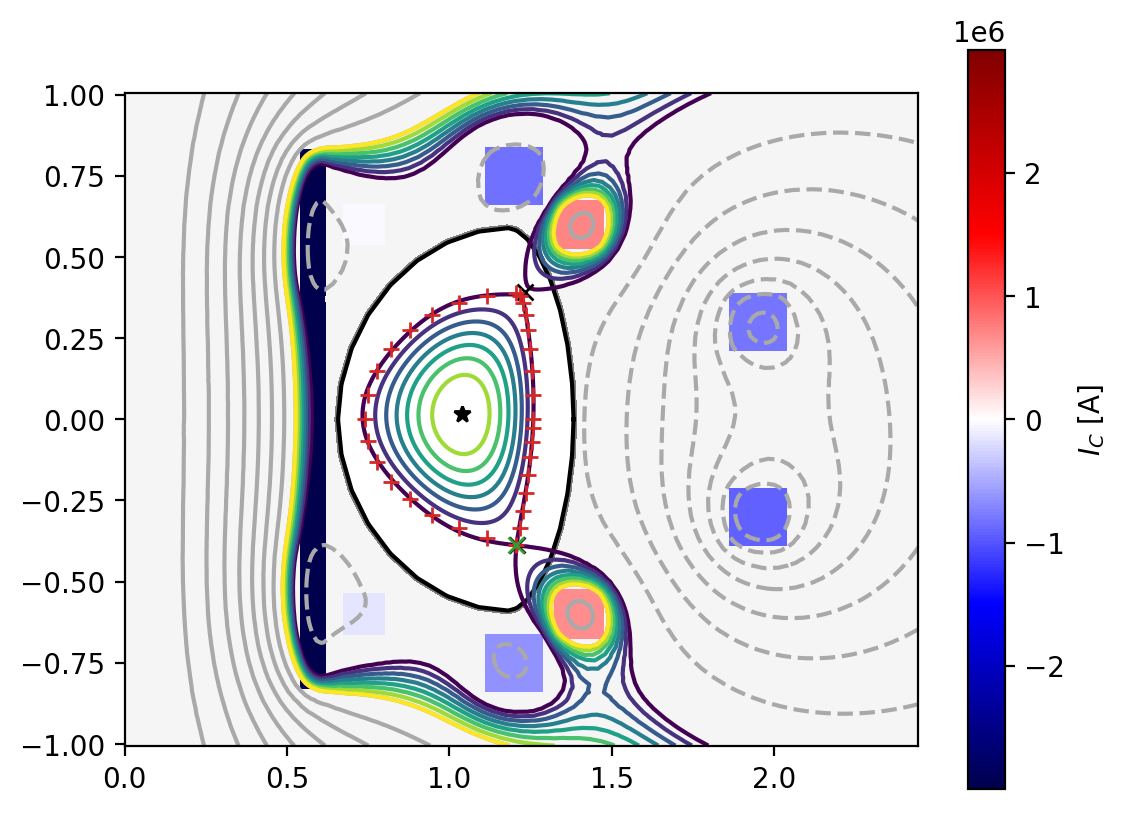

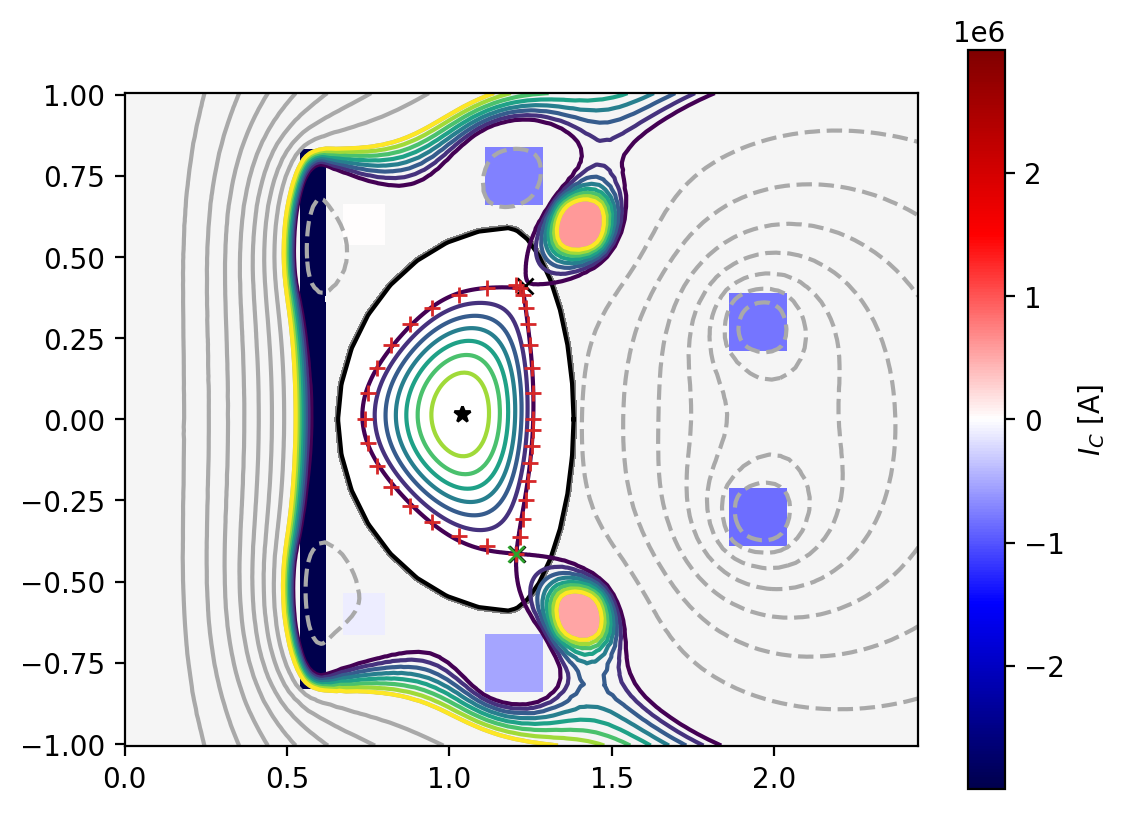

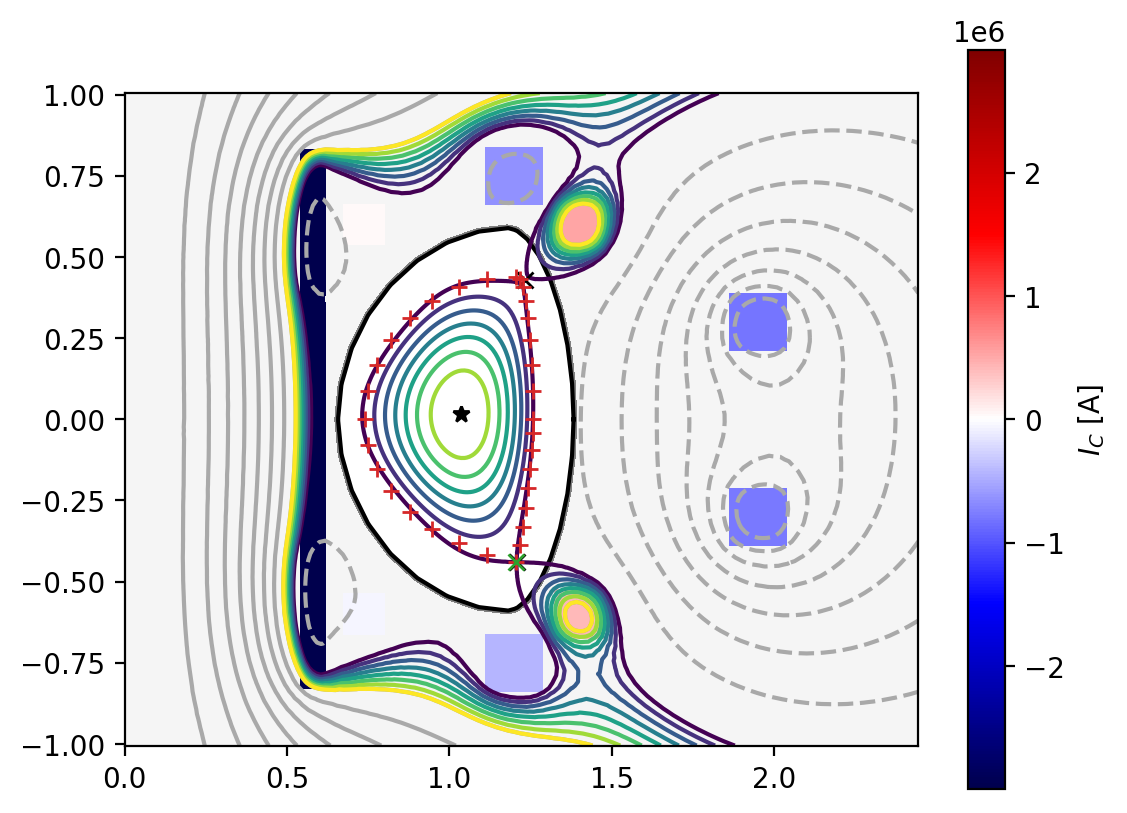

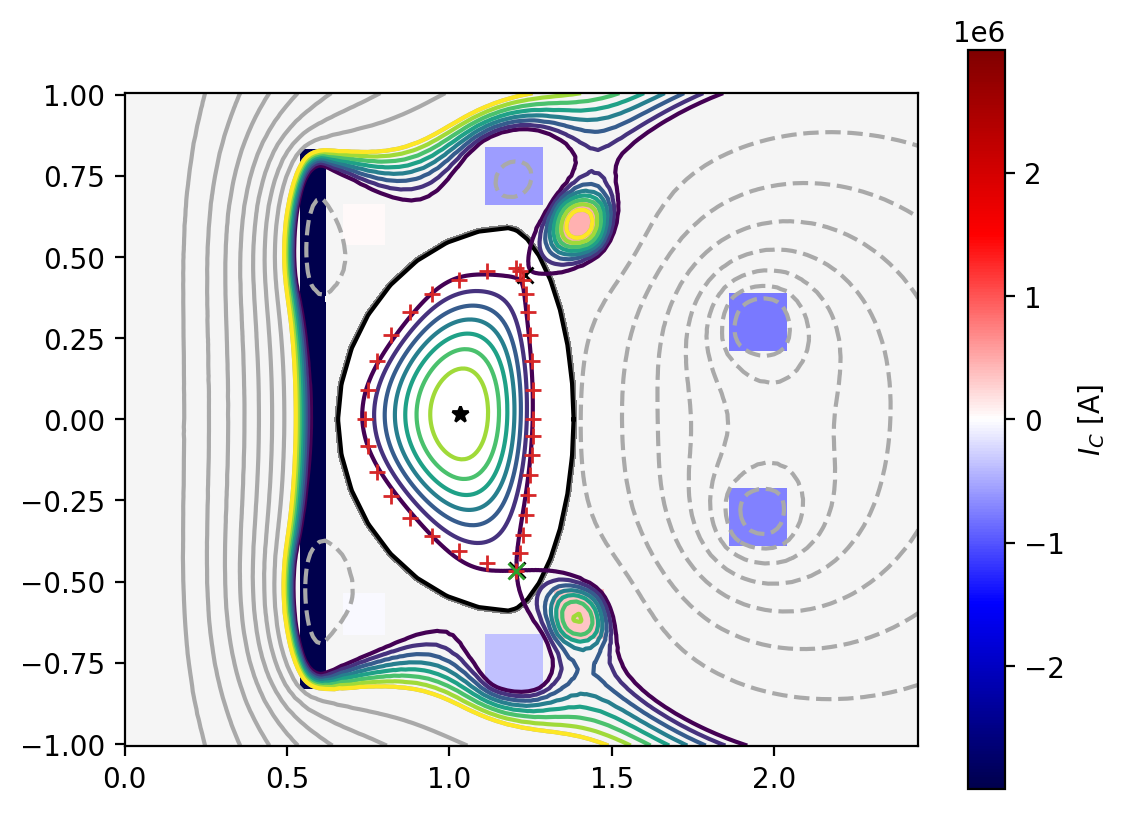

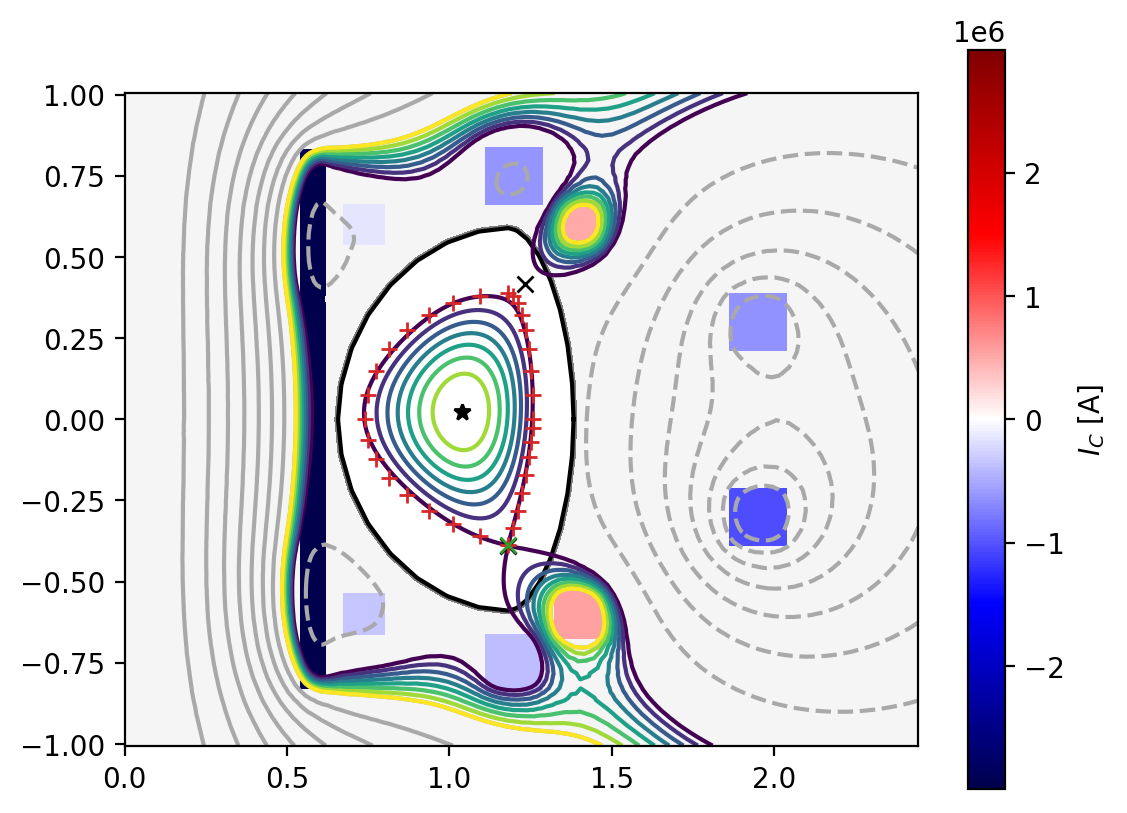

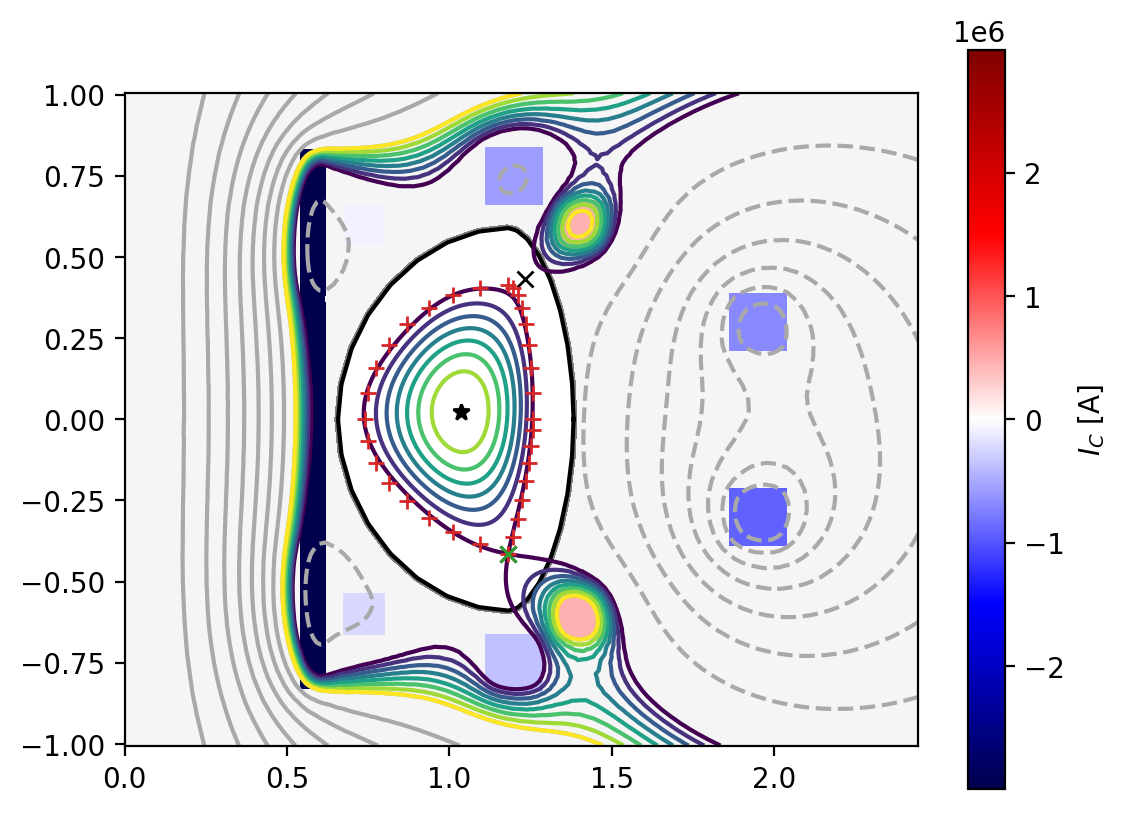

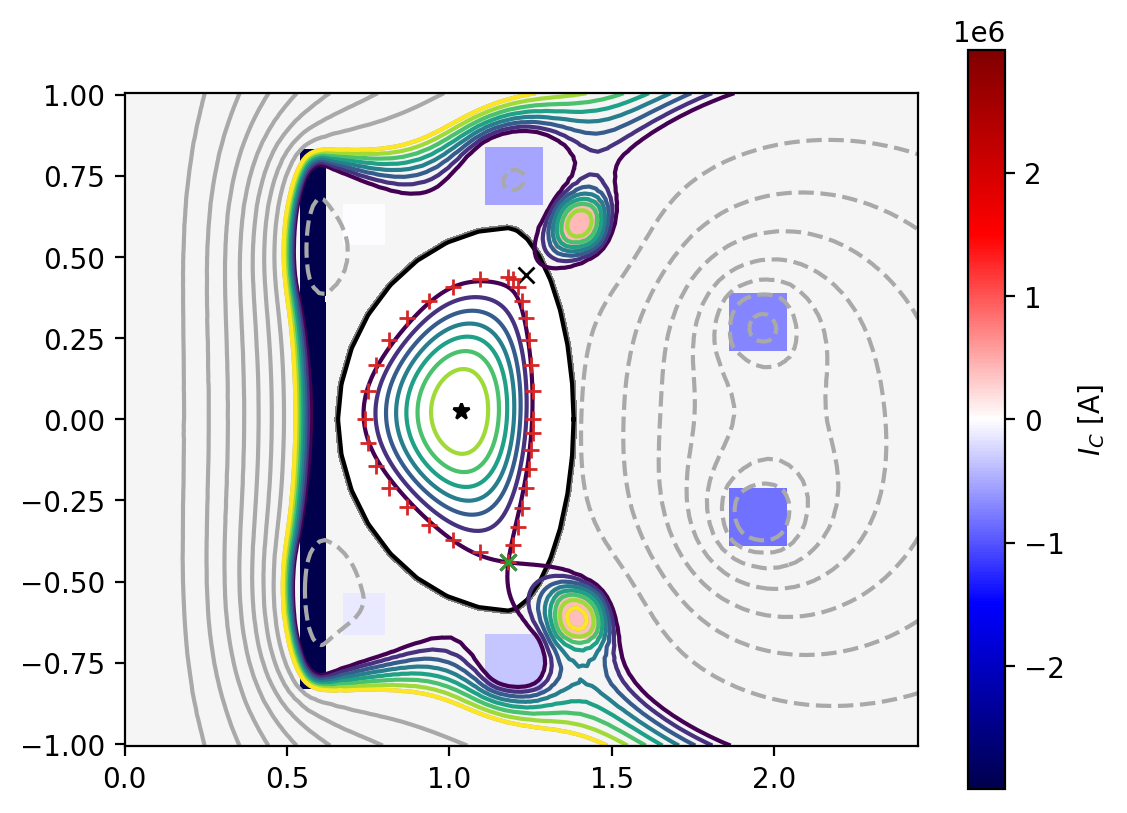

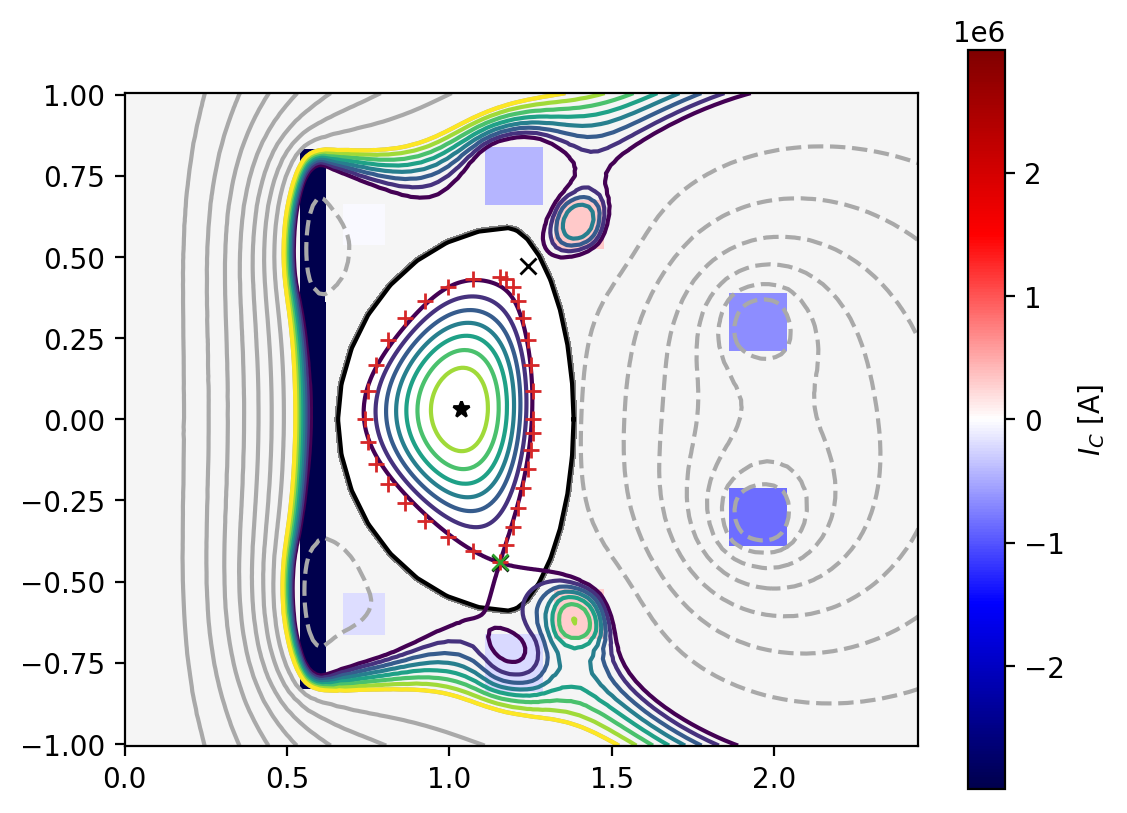

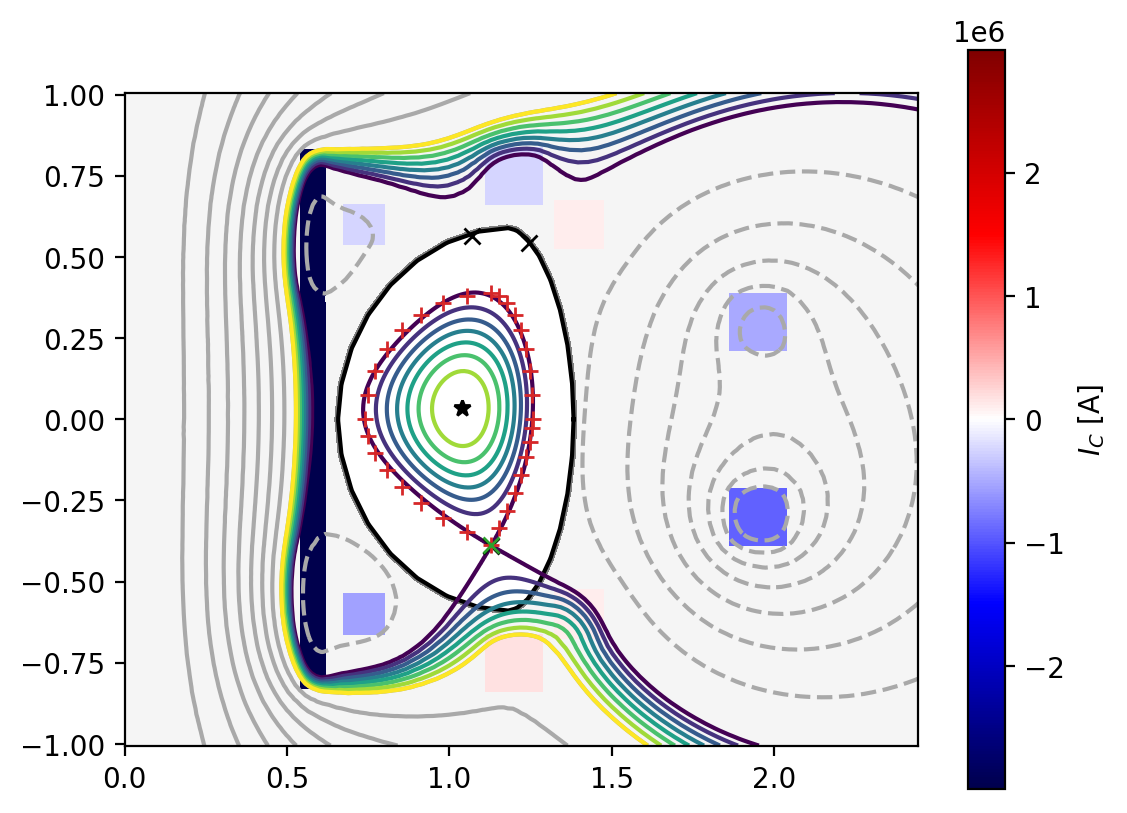

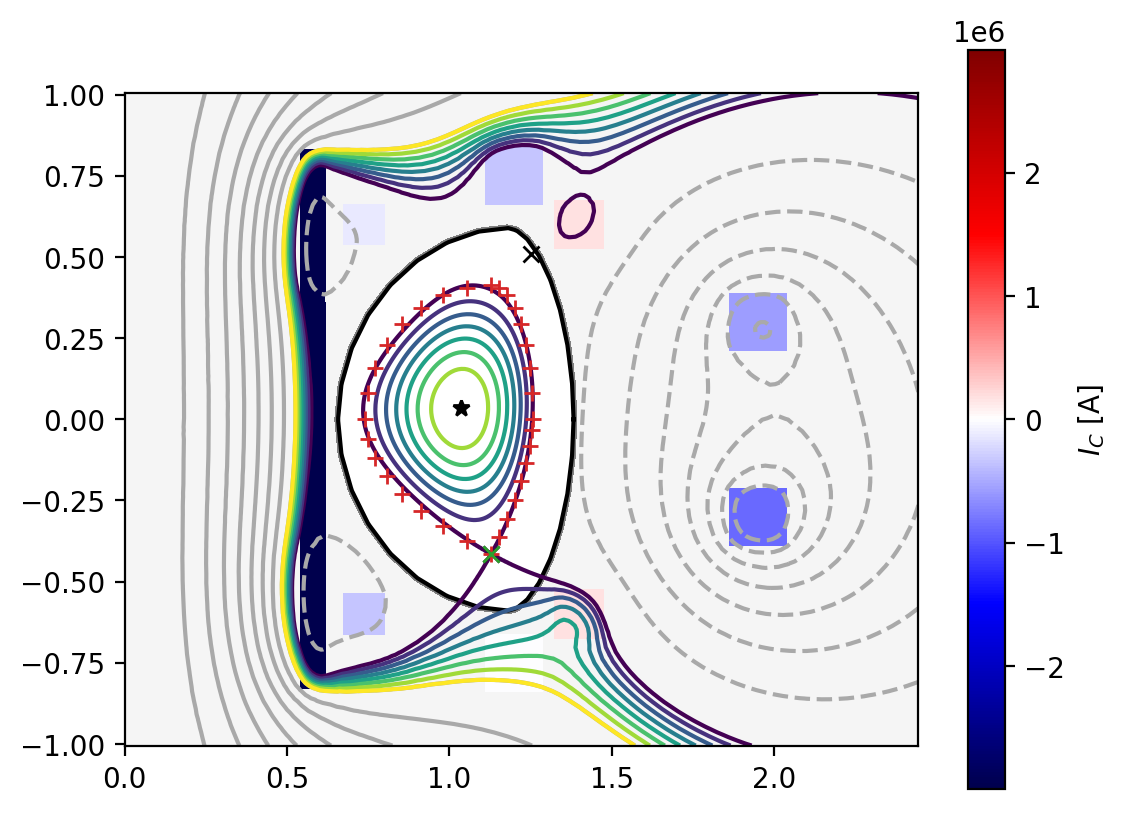

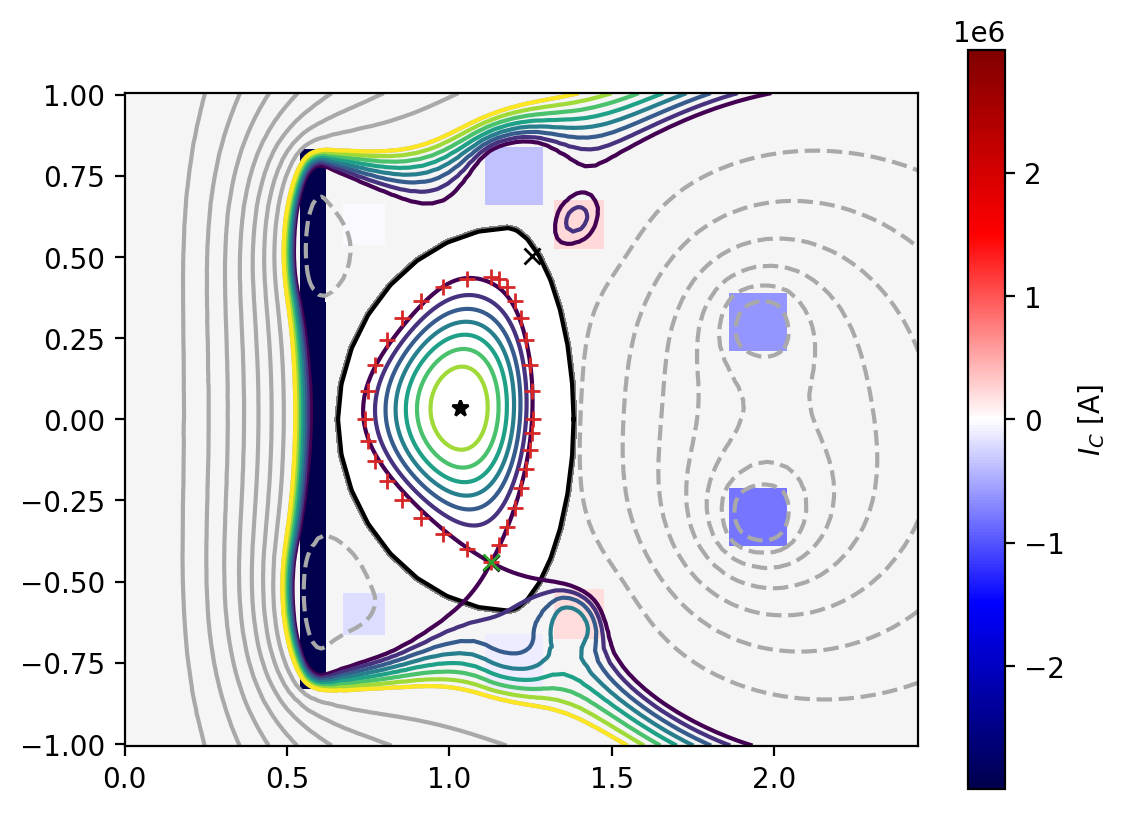

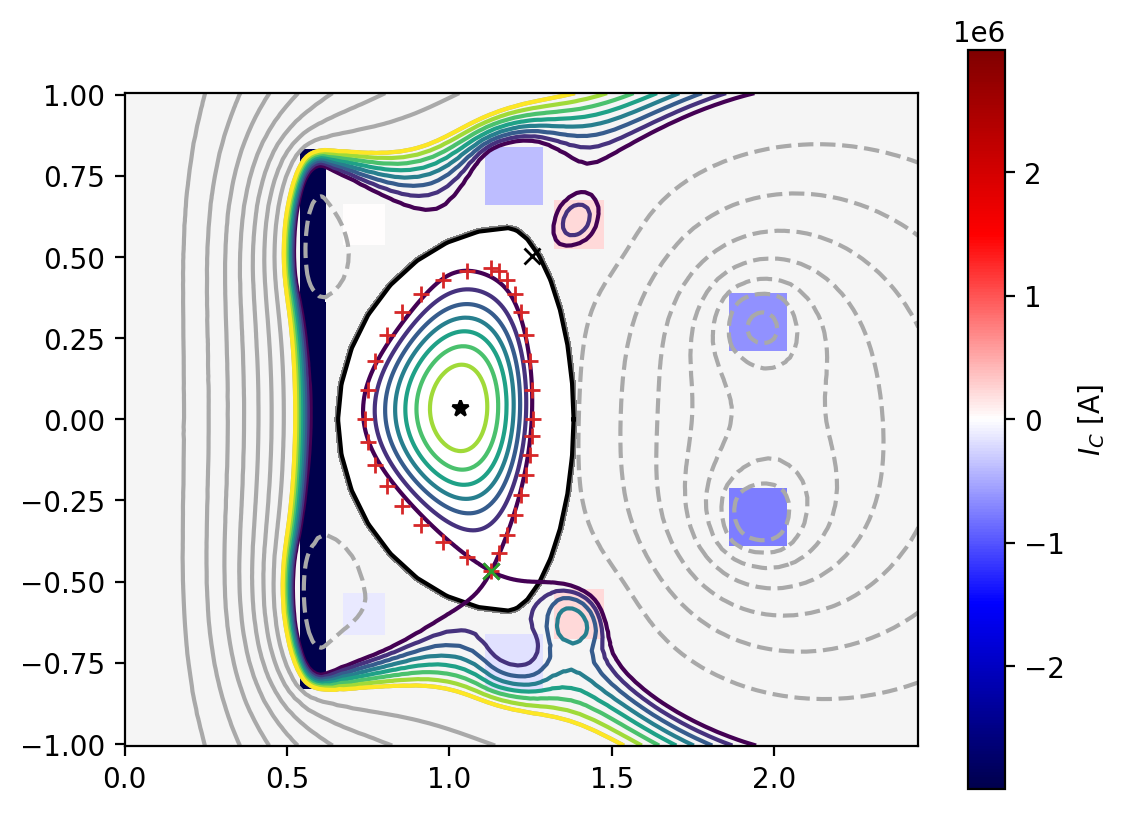

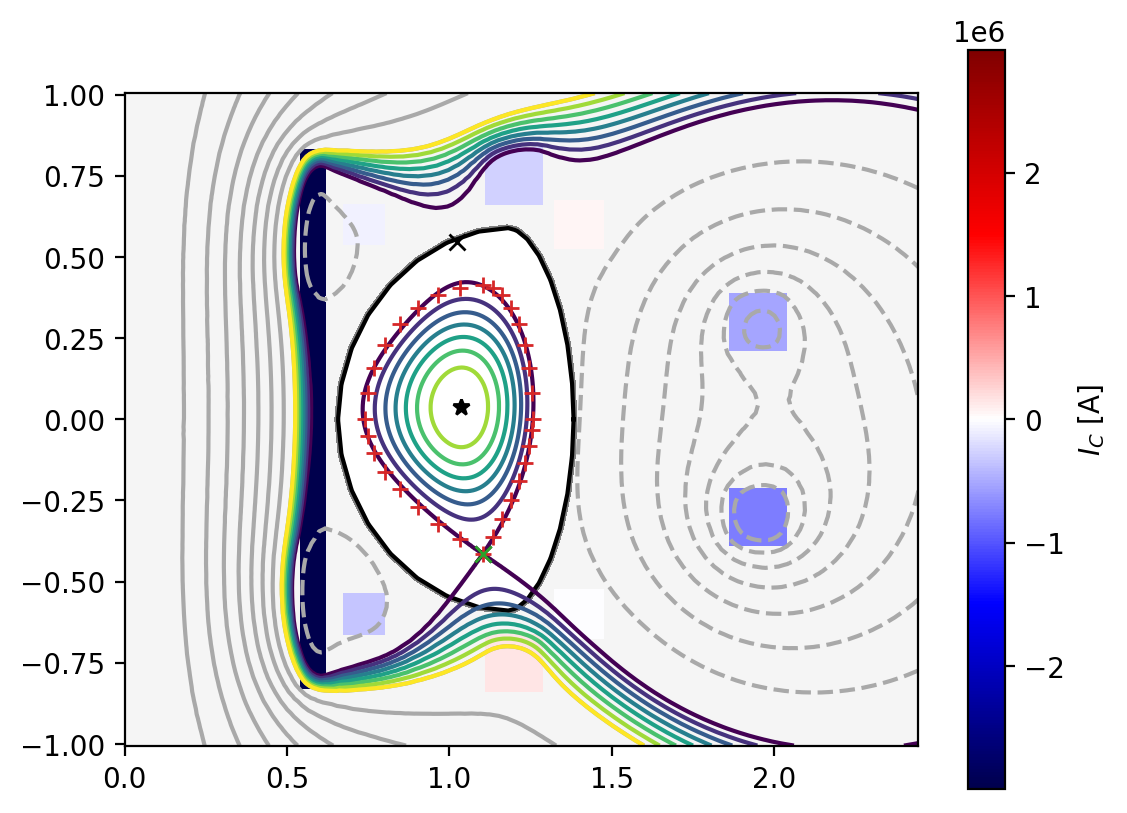

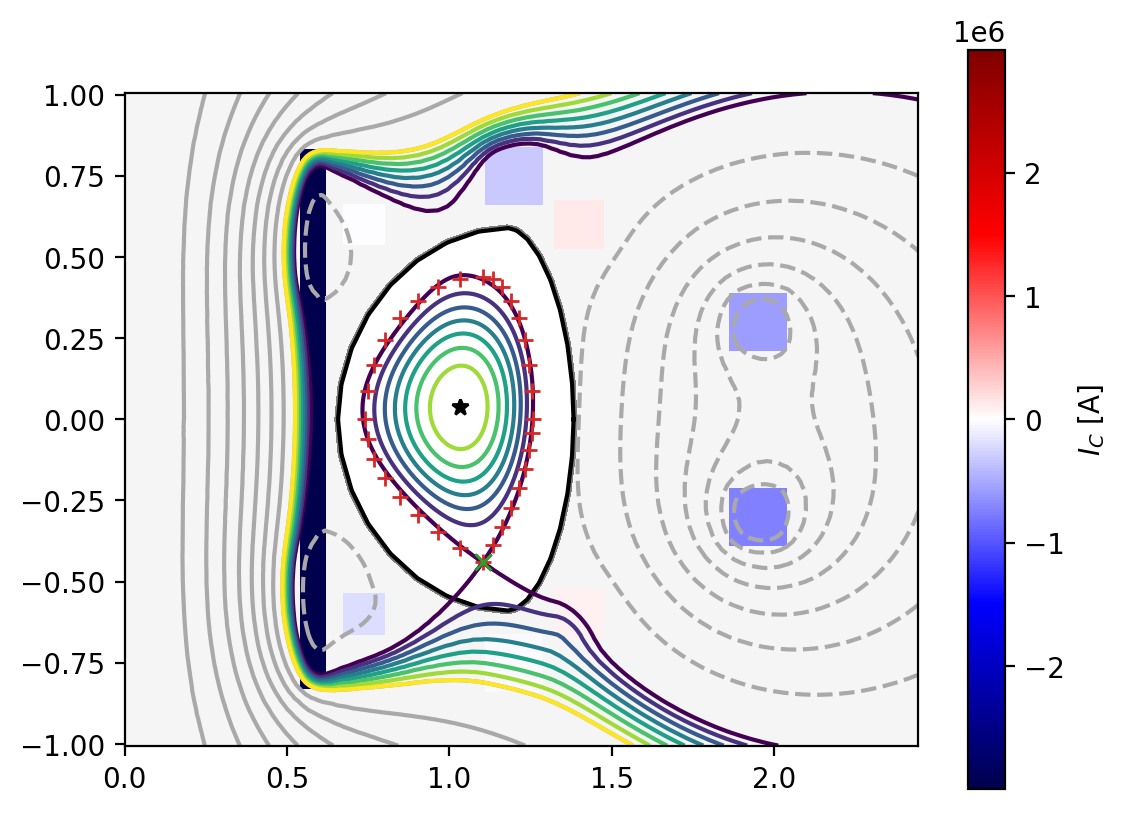

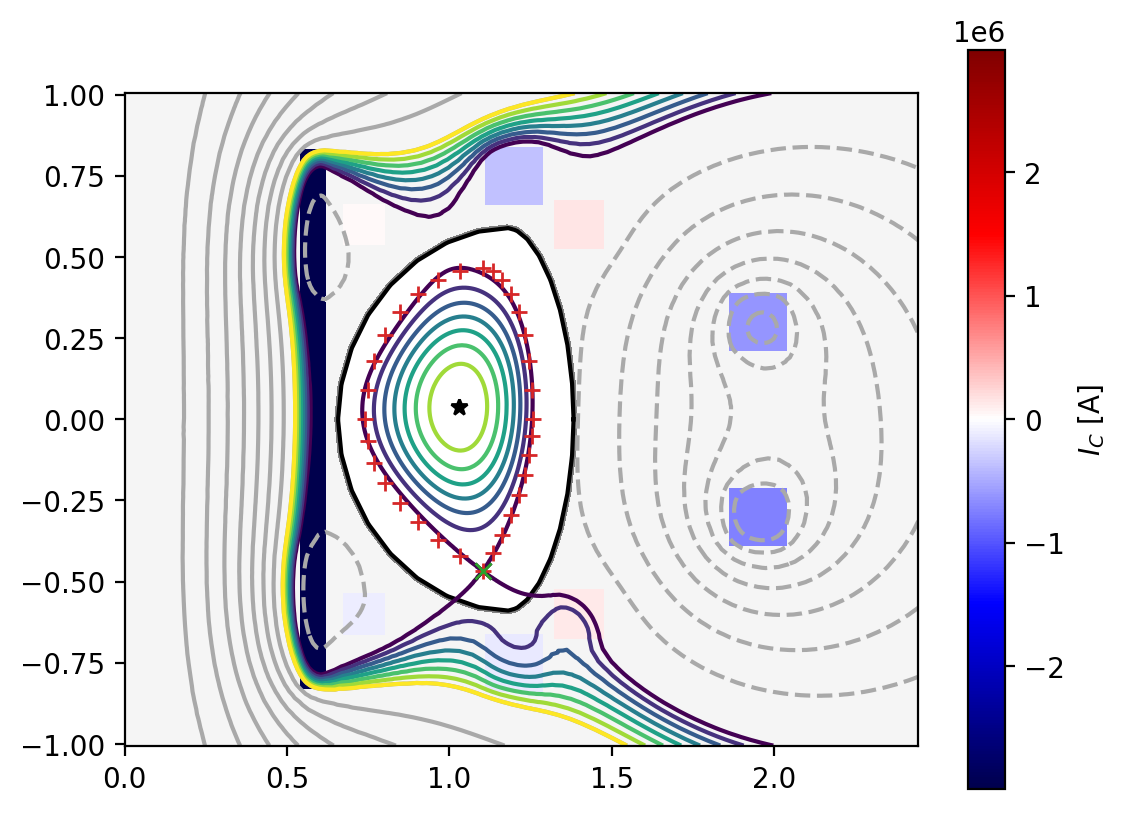

In [9]:
ds = np.linspace(-0.8, -.4, 5)
es = np.linspace(1.5, 1.8, 4)

gammas = []
taus = []
kappas = []
deltas = []
currents = []
for d in ds:
    for e in es:
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = False, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        boundary = np.nan_to_num(boundary)

        x_points = np.zeros((1,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        #x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 50*np.ones(1)
        mygs.set_saddles(x_points, x_weights)
        
        isoflux_weights = 50*np.ones(len(boundary))
        mygs.set_isoflux(boundary, isoflux_weights)
        #find equilibrium
        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

        eig_vals, eig_vecs = mygs.eig_td(-1.E5,10,True) 
        gammas.append(eig_vals[0,0])
        eig_wall, eigvec_wall = mygs.eig_wall()
        tau_w = 1/eig_wall[1][0]
        taus.append(tau_w)

        stats = mygs.get_stats()
        #deltas.append(np.min((stats['deltaU'], stats['deltaL'])))
        #kappas.append(np.max((stats['kappaU'], stats['kappaL'])))
        deltas.append(stats['delta'])
        kappas.append(stats['kappa'])

        fig, ax = plt.subplots()
        mygs.plot_machine(fig,ax, coil_symmap = True, coil_colormap = 'seismic')
        #mygs.plot_psi(fig,ax,eig_vecs[0,:],normalized=False,xpoint_color=None,opoint_color=None)
        mygs.plot_psi(fig,ax)
        mygs.plot_constraints(fig,ax)

        curr, map = mygs.get_coil_currents()
        currents.append(curr)

In [10]:
print(np.array(gammas))
#print(taus)

[ -761.60282841  -883.89691209  -998.5264957  -1102.34937175
  -621.48262769  -746.4292119   -867.9581264   -973.46723122
  -521.20083038  -624.63040799  -728.98951217  -819.59721077
  -428.90312456  -524.15213577  -621.44659763  -700.67408147
  -362.43809446  -447.22431702  -529.27350992  -607.30106642]


In [11]:
print(taus)

[0.003312882696377641, 0.0033128826963776297, 0.0033128826963776383, 0.003312882696377642, 0.0033128826963776453, 0.0033128826963776475, 0.003312882696377641, 0.003312882696377644, 0.003312882696377639, 0.003312882696377636, 0.0033128826963776422, 0.0033128826963776453, 0.0033128826963776427, 0.003312882696377641, 0.0033128826963776453, 0.0033128826963776427, 0.003312882696377632, 0.0033128826963776375, 0.003312882696377642, 0.0033128826963776396]


In [12]:

gtw = -np.array(gammas)*0.0033128919217321156
print(repr(gtw))


array([2.52310786, 2.92825494, 3.30801036, 3.65196433, 2.05890478,
       2.47283931, 2.87545147, 3.22499173, 1.72668202, 2.06933303,
       2.41506347, 2.71523698, 1.4209097 , 1.73645938, 2.05878541,
       2.3212575 , 1.20071824, 1.48160583, 1.75342594, 2.0119228 ])


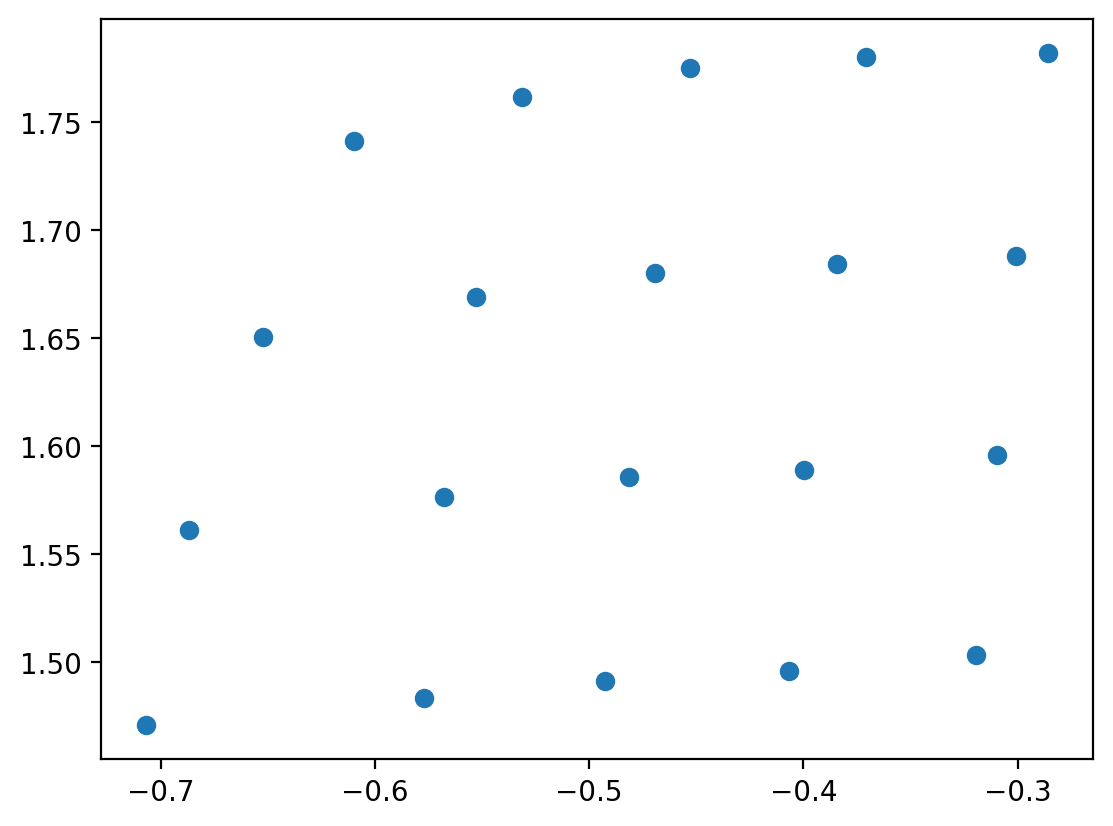

In [13]:
plt.scatter(deltas,kappas)

In [14]:
coil_currents = np.array(currents)

[-4.59162871e-02  1.69266514e-04  3.05385385e-02  4.63403482e-02
 -1.55029830e-01 -7.12703089e-02 -1.73679240e-02  1.43557154e-02
 -2.29195971e-01 -1.14600424e-01 -4.13095534e-02  1.61268440e-03
 -2.49071698e-01 -1.19202639e-01 -3.65304895e-02  1.11294675e-02
 -2.10555522e-01 -7.95169368e-02 -3.11050192e-03  4.03023701e-02]


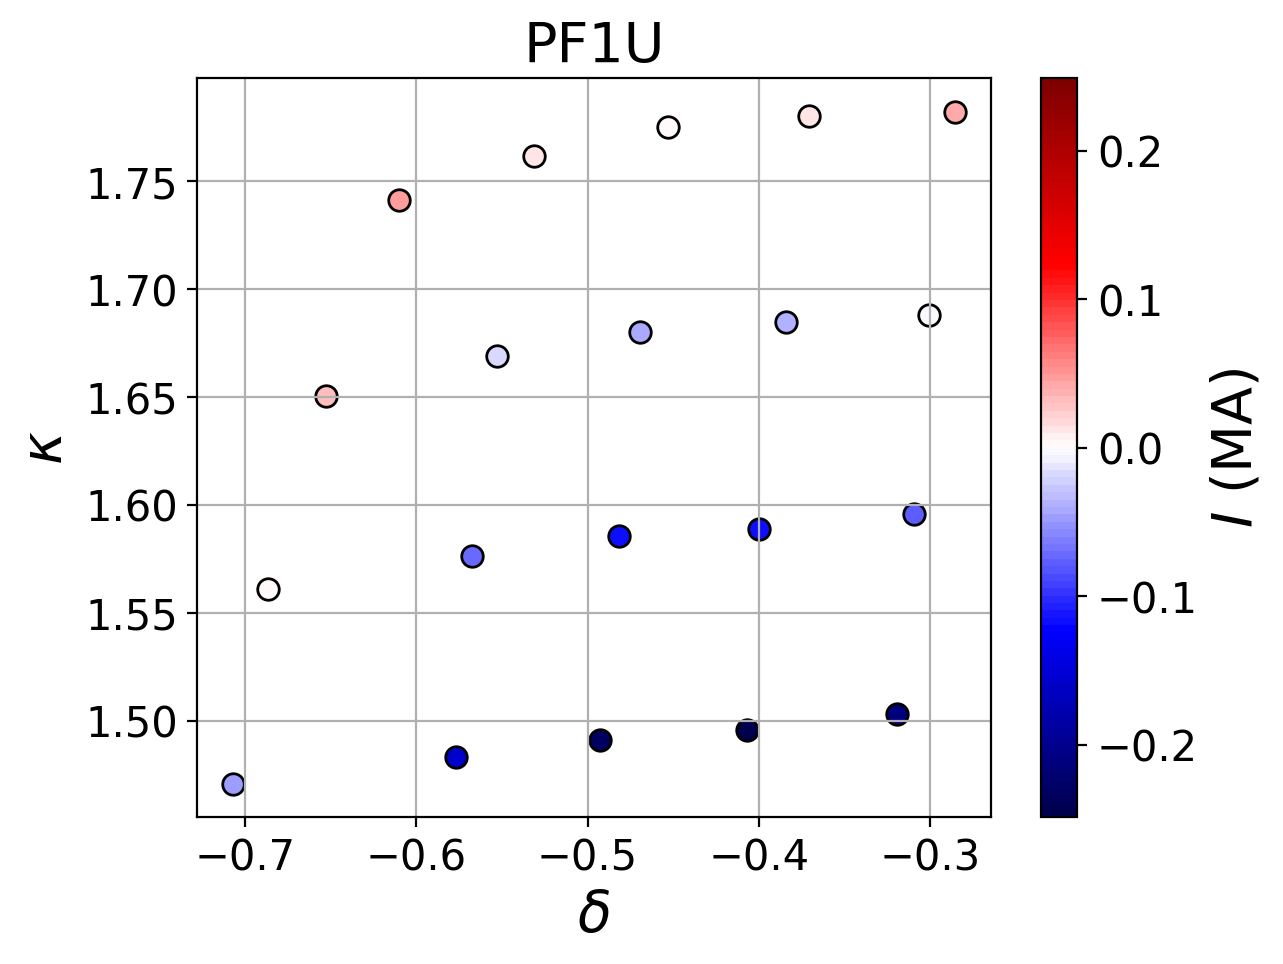

In [15]:
import matplotlib as mpl
norm = plt.Normalize(-2.49071698e-01, 2.49071698e-01)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(coil_currents[:,3]/1E6))

print(coil_currents[:,3]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF1U', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-0.16092489 -0.10305413 -0.06563887 -0.04489712 -0.34456475 -0.21922989
 -0.13805443 -0.08740945 -0.48739335 -0.30831921 -0.18930979 -0.11562675
 -0.56129646 -0.34763511 -0.20845835 -0.1214127  -0.55168774 -0.3299857
 -0.18888888 -0.10192821]


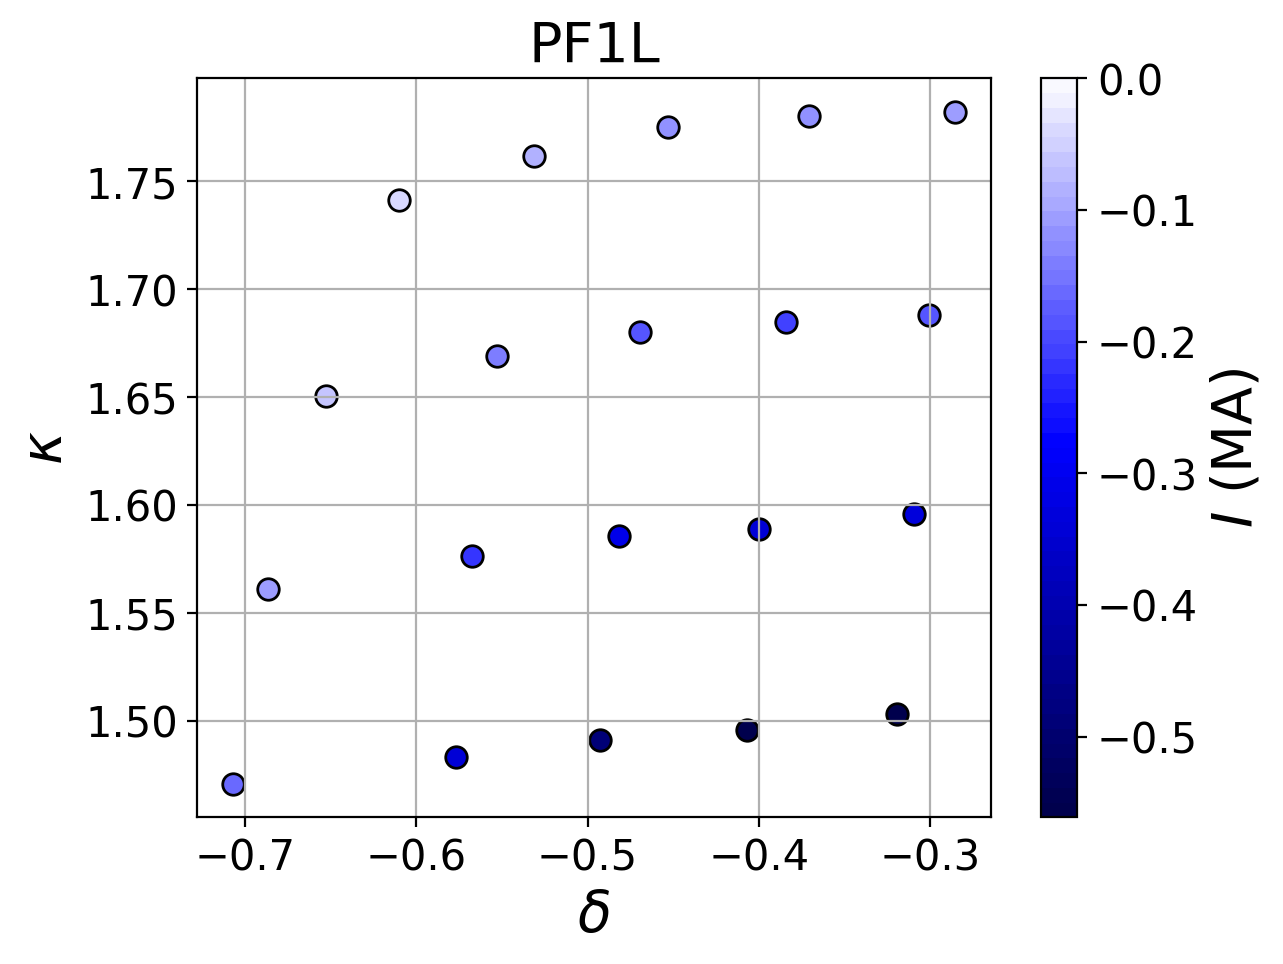

In [16]:
import matplotlib as mpl
norm = plt.Normalize(-0.56129646, 0)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:50,:-1])
c = cmap(norm(coil_currents[:,7]/1E6))

print(coil_currents[:,7]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF1L', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-0.84195957 -0.73215455 -0.64617862 -0.57380392 -0.62595519 -0.58147203
 -0.53808554 -0.49616423 -0.41856897 -0.4420763  -0.44229853 -0.42868024
 -0.24874188 -0.33196271 -0.370522   -0.38106814 -0.13117824 -0.26331078
 -0.3268915  -0.35452803]


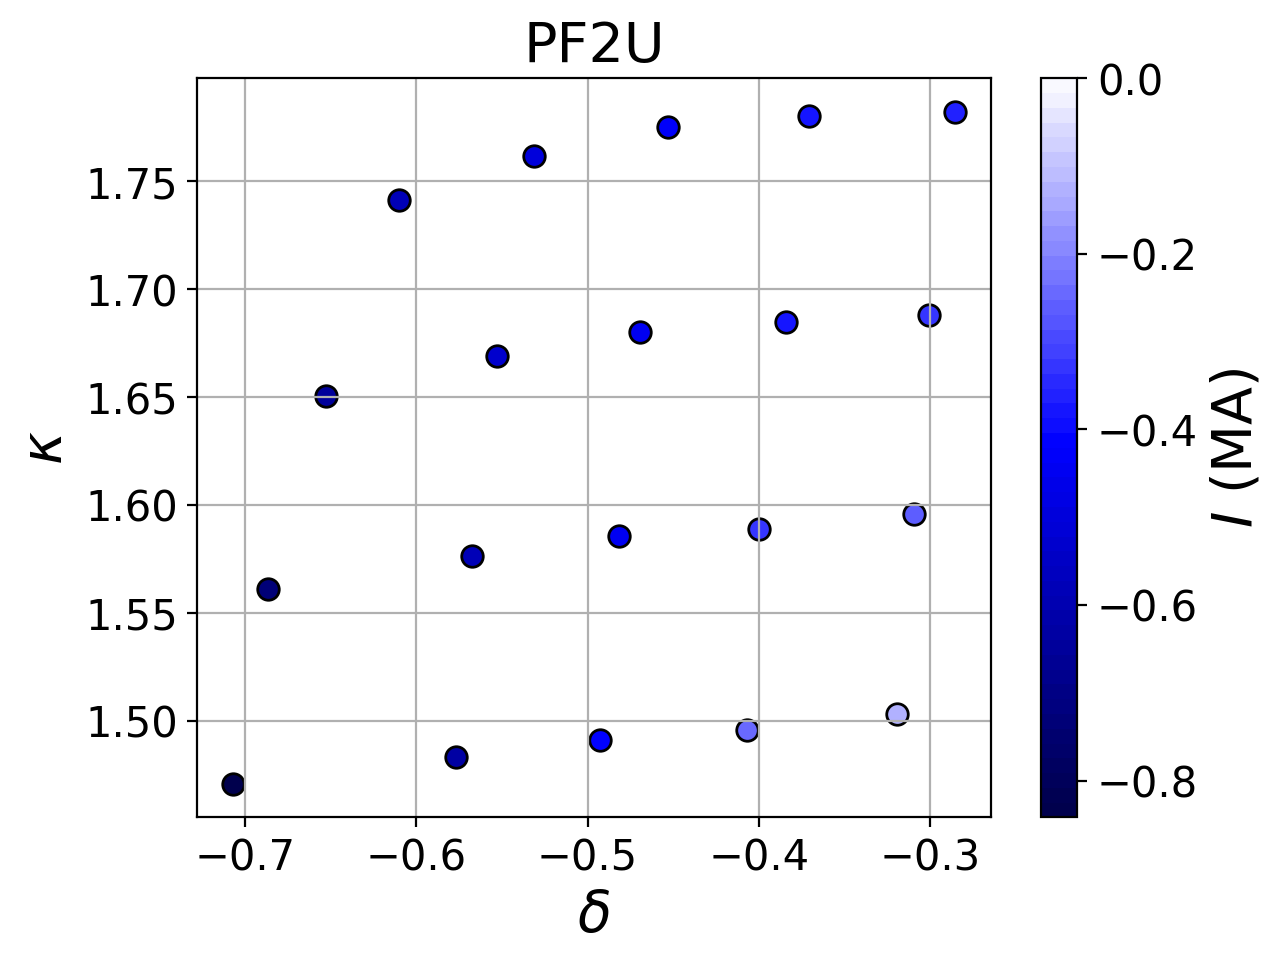

In [17]:
import matplotlib as mpl
norm = plt.Normalize(-0.84195957, 0)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:50,:-1])
c = cmap(norm(coil_currents[:,4]/1E6))

print(coil_currents[:,4]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF2U', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-0.651805   -0.53148854 -0.44083152 -0.3688839  -0.38716598 -0.3621668
 -0.33183336 -0.30221546 -0.10433491 -0.18141366 -0.22136054 -0.23638569
  0.1718898  -0.00999073 -0.11628521 -0.17774224  0.41149386  0.1432714
 -0.0234878  -0.12555487]


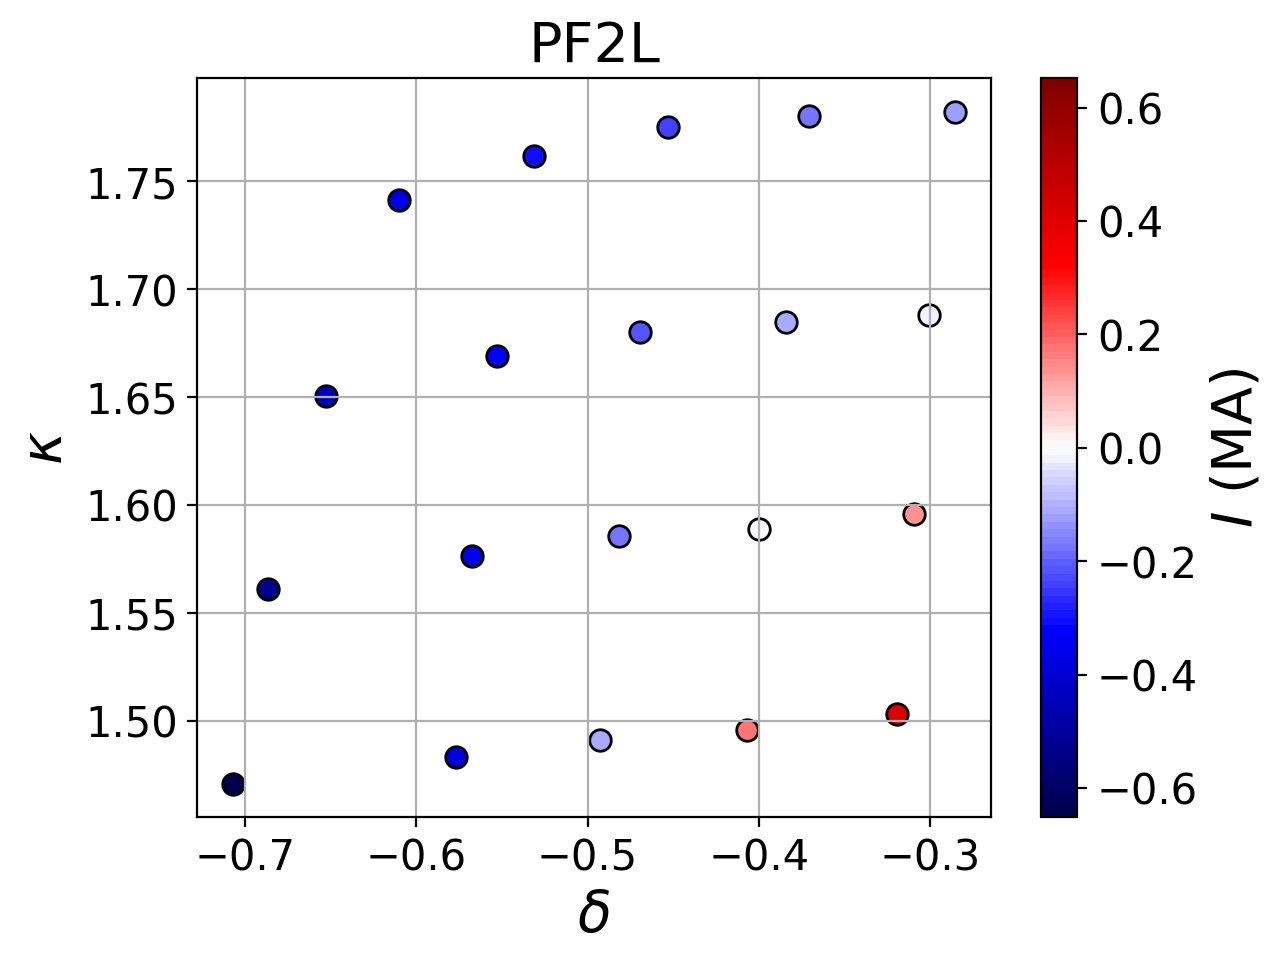

In [18]:
import matplotlib as mpl
norm = plt.Normalize(-0.651805, 0.651805)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(coil_currents[:,8]/1E6))

print(coil_currents[:,8]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF2L', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[ 0.71287893  0.60789024  0.52420633  0.4538457   0.50739814  0.45906722
  0.41516478  0.37536469  0.30321448  0.31363301  0.30866118  0.29598654
  0.11429044  0.17964774  0.21227461  0.22367864 -0.05122772  0.06829947
  0.13087669  0.16274721]


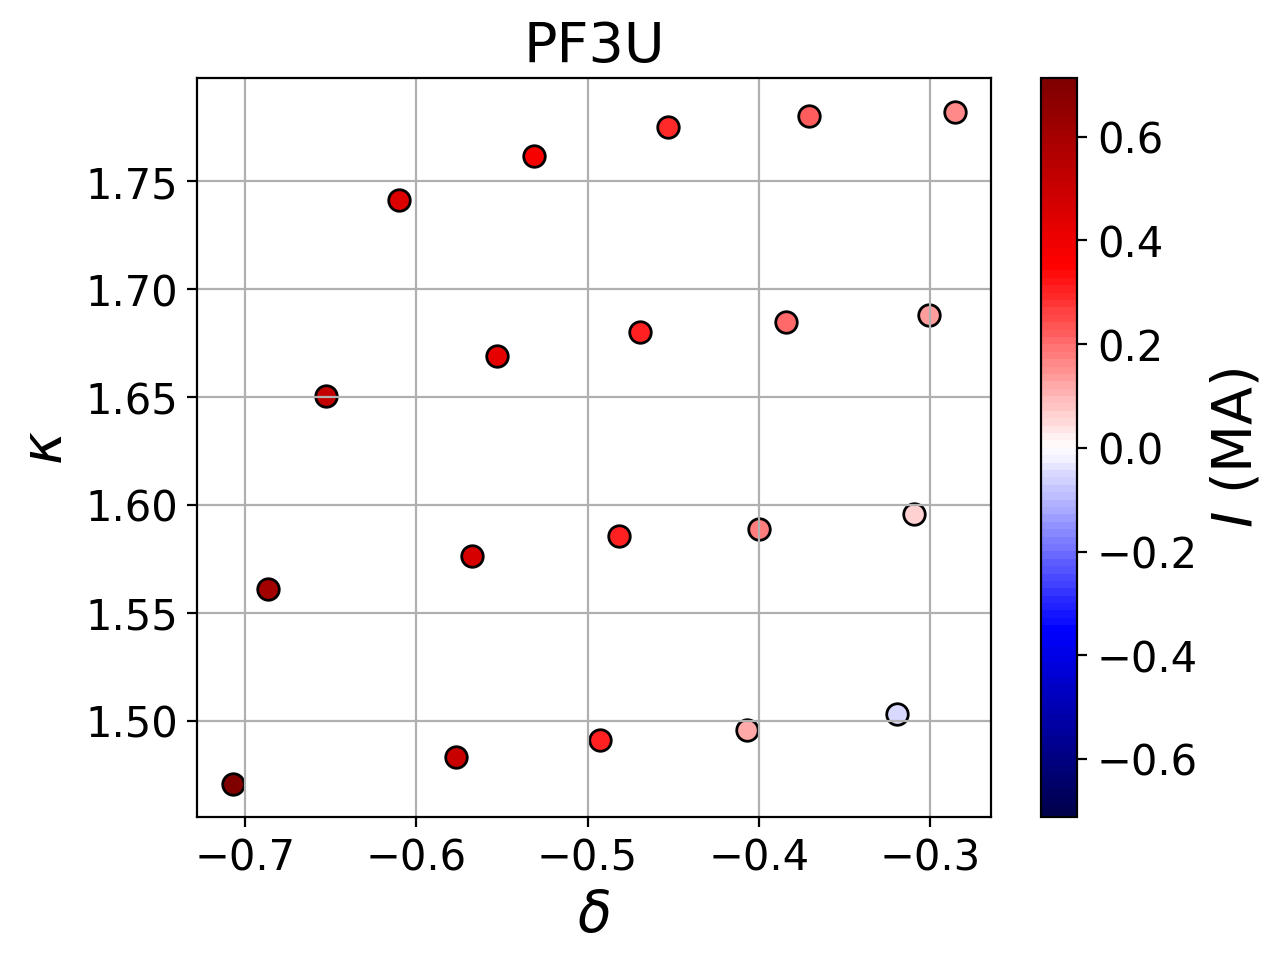

In [19]:
import matplotlib as mpl
norm = plt.Normalize(-0.71287893, 0.71287893)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(coil_currents[:,5]/1E6))

print(coil_currents[:,5]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF3U', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[ 0.67405753  0.52712865  0.41583973  0.33161894  0.555758    0.45841666
  0.37778447  0.31385357  0.3606938   0.3337433   0.3027562   0.27079018
  0.10935129  0.17405405  0.20062362  0.21136462 -0.16249796 -0.01244187
  0.07945902  0.13527143]


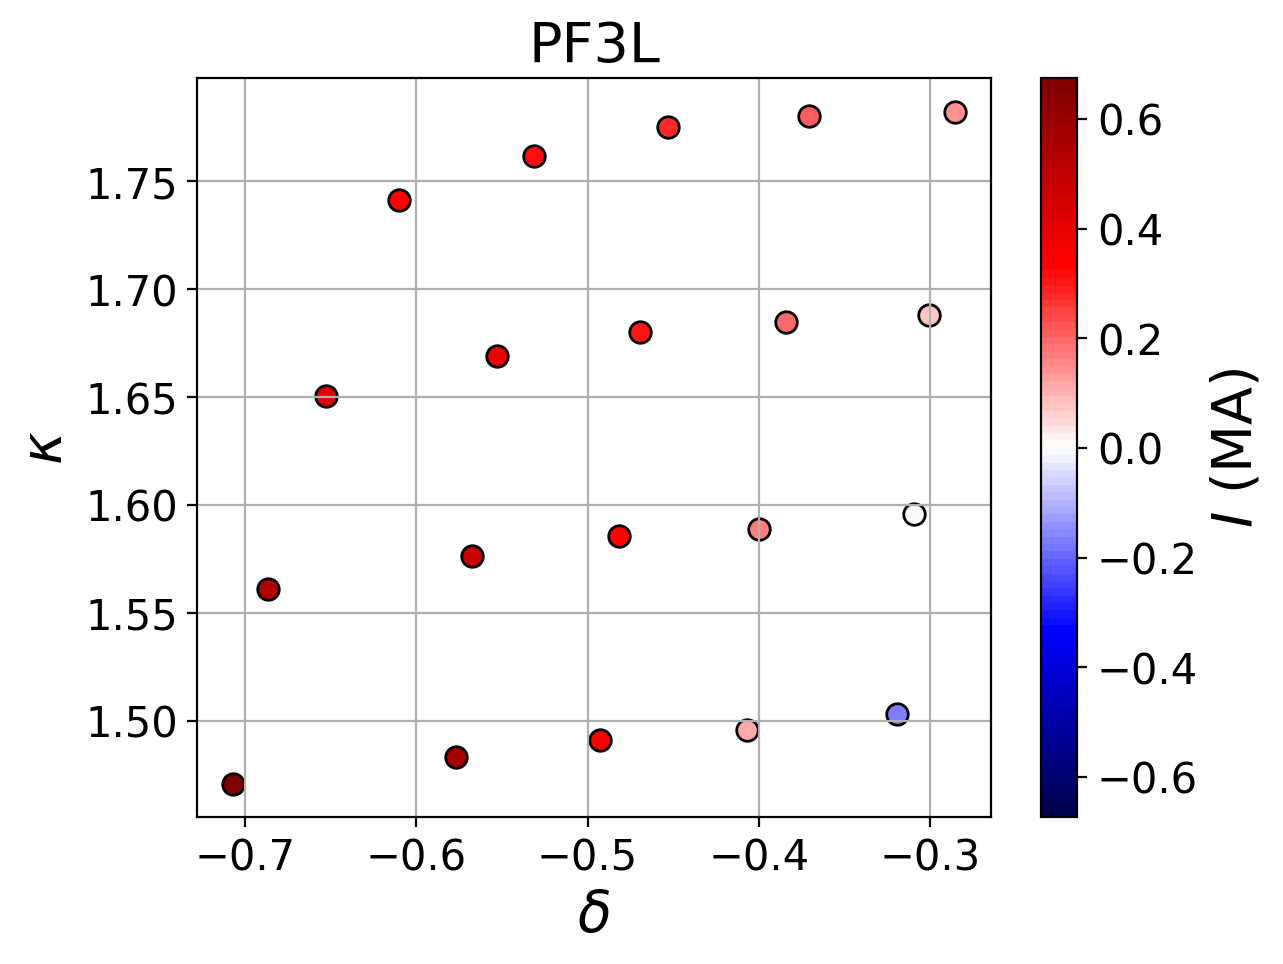

In [20]:
import matplotlib as mpl
norm = plt.Normalize(-0.67405753, 0.67405753)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:,:-1])
c = cmap(norm(coil_currents[:,9]/1E6))

print(coil_currents[:,9]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF3L', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-0.80110258 -0.80119312 -0.79951175 -0.79231327 -0.65261721 -0.68804055
 -0.71552811 -0.7370111  -0.56145454 -0.61901937 -0.65972149 -0.69355772
 -0.50304007 -0.56418283 -0.61626218 -0.65298459 -0.45065721 -0.53119034
 -0.58260563 -0.6192415 ]


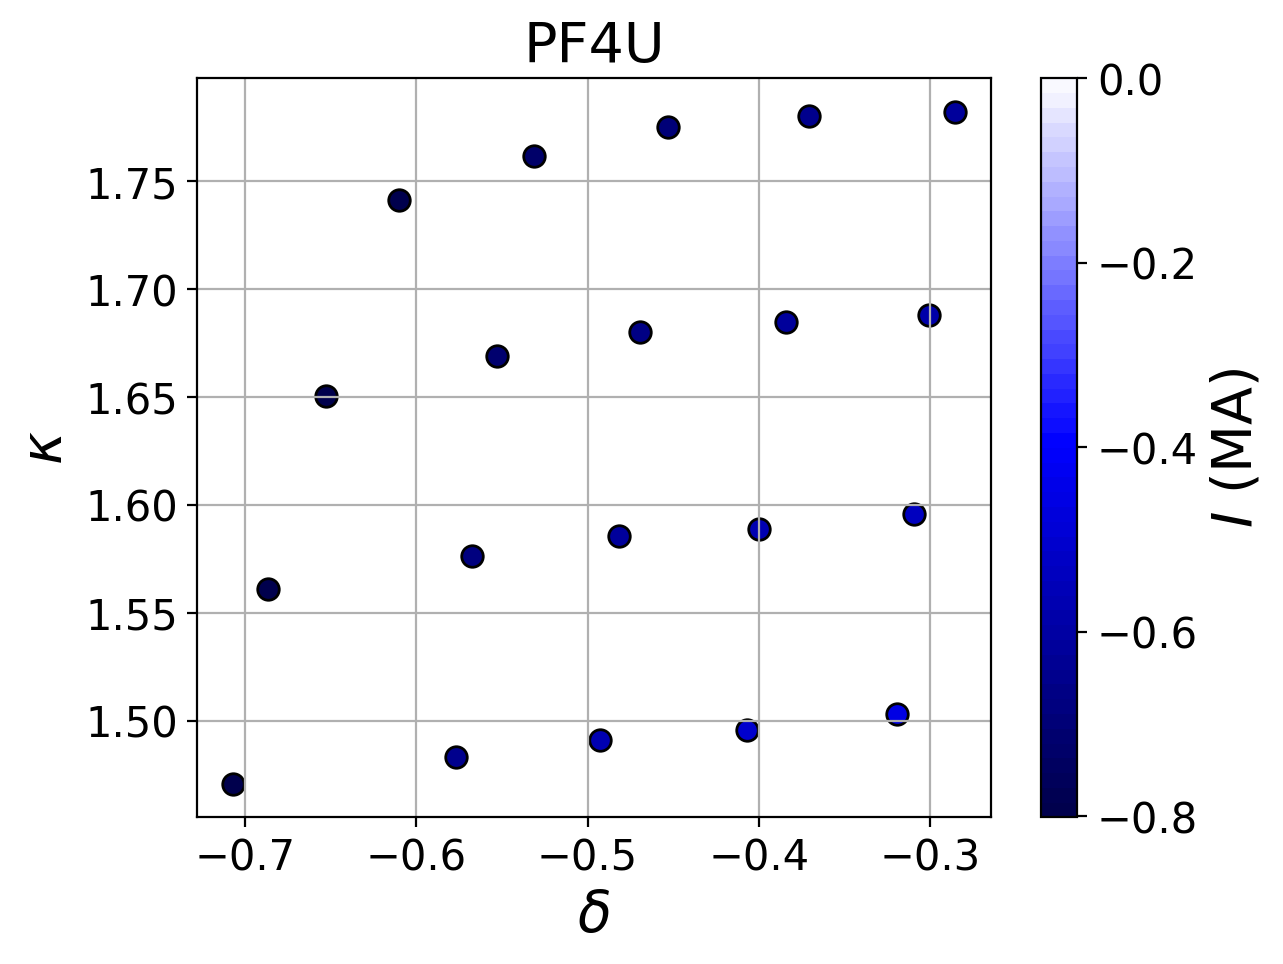

In [21]:
import matplotlib as mpl
norm = plt.Normalize(-0.80119312, 0)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:50,:-1])
c = cmap(norm(coil_currents[:,6]/1E6))

print(coil_currents[:,6]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF4U', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

[-0.93088147 -0.84450524 -0.77729869 -0.73071856 -1.03395114 -0.92681872
 -0.84171171 -0.77494372 -1.02532333 -0.92340972 -0.84519694 -0.78065483
 -0.93488281 -0.87206117 -0.81051785 -0.76412278 -0.80564909 -0.77102347
 -0.7461793  -0.72490152]


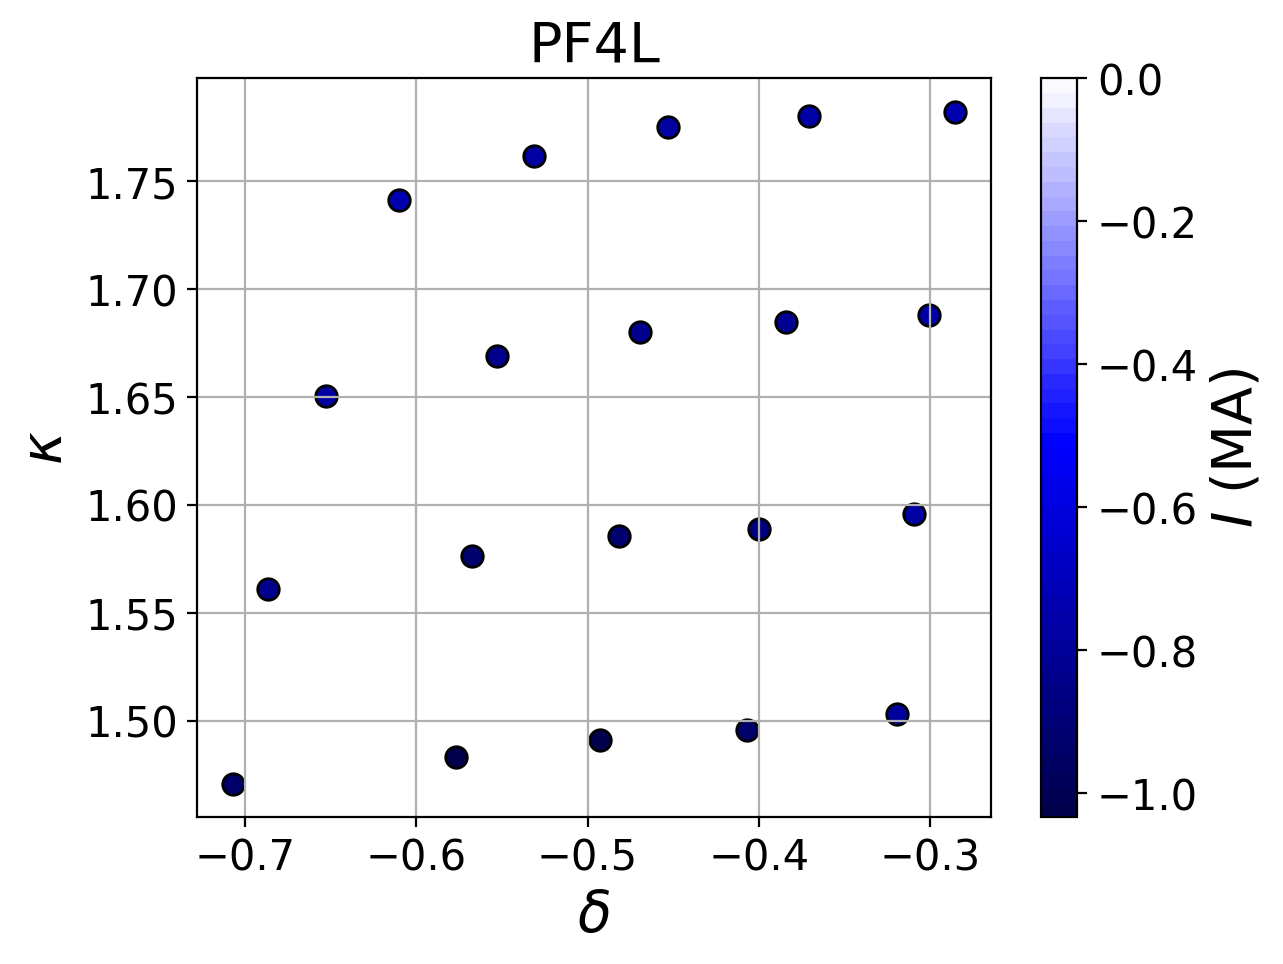

In [22]:
import matplotlib as mpl
norm = plt.Normalize(-1.03395114, 0)
cmap = mpl.cm.seismic(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:50,:-1])
c = cmap(norm(coil_currents[:,10]/1E6))

print(coil_currents[:,10]/1E6)

for i in range(20):
    plt.scatter(deltas[i], kappas[i], color = c[i], edgecolors = 'k', s = 60)
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
#plt.xlim([-0.7, -0.2])
#plt.ylim([1.4, 1.95])
plt.xticks(np.linspace(-0.7, -0.3, 5),size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title(r'PF4L', size = 20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm)
cb.set_label(label=r'$I$ (MA)', size = 20)
cb.ax.tick_params(labelsize=15)

In [25]:
print(repr(gtw))

array([2.52310786, 2.92825494, 3.30801036, 3.65196433, 2.05890478,
       2.47283931, 2.87545147, 3.22499173, 1.72668202, 2.06933303,
       2.41506347, 2.71523698, 1.4209097 , 1.73645938, 2.05878541,
       2.3212575 , 1.20071824, 1.48160583, 1.75342594, 2.0119228 ])
